In [1]:
import sys
sys.path.append('../')

import torch
import numpy as np
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tools.img import rgb2yuv, yuv2rgb

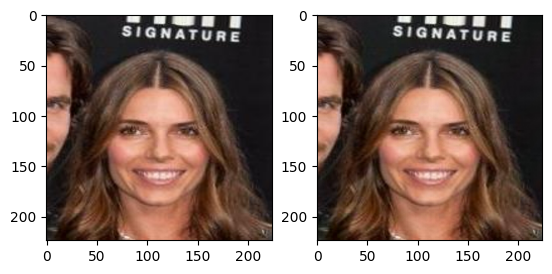

[[52 53 54]
 [51 52 53]
 [62 62 62]]
[[54 55 56]
 [53 54 55]
 [63 63 63]]


-0.5563915019132653

In [13]:
x_img = PIL.Image.open('../resource/example/000107.jpg')
x_img = x_img.resize((224, 224))
x_c = np.array(x_img).astype(np.uint16)

x_c_yuv = rgb2yuv(x_c)

x_fft = np.fft.fft2(x_c_yuv, axes=(-3, -2))
x_fft_amp, x_fft_pha = np.abs(x_fft), np.angle(x_fft)
x_fft_pha[-3:-1, -3:-1, 1:3] = np.pi

x_p_fft = x_fft_amp * np.exp(1j * x_fft_pha)
x_p_yuv = np.fft.ifft2(x_p_fft, axes=(-3, -2)).real
x_p = yuv2rgb(x_p_yuv)
x_p = np.clip(x_p, 0, 255).astype(np.uint8)

_, ax = plt.subplots(1, 2)
ax[0].imshow(x_c)
ax[1].imshow(x_p)
plt.show()
print(x_c[0:3, 0:3, 1])
print(x_p[0:3, 0:3, 1])

x_p = x_p.astype(float)
x_c = x_c.astype(float)

(x_p[:,:, 1:3] - x_c[:,:, 1:3]).mean()